In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors
from pandas import to_datetime

In [2]:
savename='XTime_LES3'

In [3]:
# Global path = "/global/scratch/users/adac/Slope_Flow/SlopeFlow/WRFV3/LES3/"
# Template file = "wrfout_d01_2014-03-21_12:00:00"

path = "../WRFV3/LES3"
file= "wrfout_d01_2014-03-21_12:00:00"

ds = xr.open_dataset(path+'/'+file)#+'.nc')
ds

<xarray.Dataset>
Dimensions:                (Time: 121, south_north: 149, west_east: 399,
                            bottom_top: 68, bottom_top_stag: 69,
                            soil_layers_stag: 4, west_east_stag: 400,
                            south_north_stag: 150)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, south_north, west_east, bottom_top,
                                bottom_top_stag, soil_layers_stag,
                                west_east_stag, south_north_stag
Data variables: (12/153)
    Times                  (Time) |S19 ...
    LU_INDEX               (Time, south_north, west_east) float32 ...
    ZNU                    (Time, bottom_top) float32 ...
    ZNW                    (Time, bottom_top_stag) float32 ...
    ZS                     (Time, soil_layers_stag) float32 ...
    DZS                    (Time, soil_layers_stag) float32 ...
    ...                     ...
    PCB                    (Time, south_north, west_east) float32 ...
    PC                     (Time, south_north, west_east) float32 ...
    LANDMASK               (Time, south_north, west_east) float32 ...
    LAKEMASK               (Time, south_north, west_east) float32 ...
    SST                    (Time, south_north, west_east) float32 ...
    SST_INPUT              (Time, south_north, west_east) float32 ...
Attributes: (12/119)
    TITLE:                            OUTPUT FROM WRF V3.9.1.1 MODEL
    START_DATE:                      2014-03-21_12:00:00
    SIMULATION_START_DATE:           2014-03-21_12:00:00
    WEST-EAST_GRID_DIMENSION:        400
    SOUTH-NORTH_GRID_DIMENSION:      150
    BOTTOM-TOP_GRID_DIMENSION:       69
    ...                              ...
    ISLAKE:                          0
    ISICE:                           0
    ISURBAN:                         0
    ISOILWATER:                      0
    HYBRID_OPT:                      -1
    ETAC:                            0.0

In [4]:
timesStr = [bytestring.decode('utf-8') for bytestring in ds['Times'].values]
times = to_datetime(timesStr, format='%Y-%m-%d_%H:%M:%S')
nt = len(times)
dt = 0.5/60 # 30 s/60(s/min)/60(min/hr) = dt [hrs] 
tv = np.arange(0,nt*dt,dt).T + 17.5 # starts 17:30

In [5]:
nx = ds.dims["west_east_stag"]
dx = ds.attrs['DX']
xmid = (nx-1)/2*dx
xmid

9975.0

In [6]:
xv = np.arange(0,nx*dx,dx) - xmid
x = np.tile(xv, (nt,1))
x.shape

(121, 400)

In [7]:
t = np.tile(tv, (nx,1)).T
t.shape

(121, 400)

In [8]:
u = ds['U'][:,0].mean(dim=["south_north"])
u

<xarray.DataArray 'U' (Time: 121, west_east_stag: 400)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.0302911 , -0.4148758 ,  0.4761541 , ..., -0.02590723,
         0.21588552, -0.0302911 ],
       [ 0.22777478,  0.37577567,  0.42388478, ..., -0.12898944,
         0.12083874,  0.22777478],
       ...,
       [ 0.02328678,  0.03990363,  0.04063236, ...,  0.03495942,
         0.02839435,  0.02328678],
       [-0.07681782,  0.02659738,  0.0269705 , ..., -0.00088104,
        -0.0442043 , -0.07681782],
       [-0.11072783,  0.01007077, -0.03300945, ..., -0.02190854,
        -0.12991238, -0.11072783]], dtype=float32)
Coordinates:
    XTIME    (Time) datetime64[ns] ...
Dimensions without coordinates: Time, west_east_stag

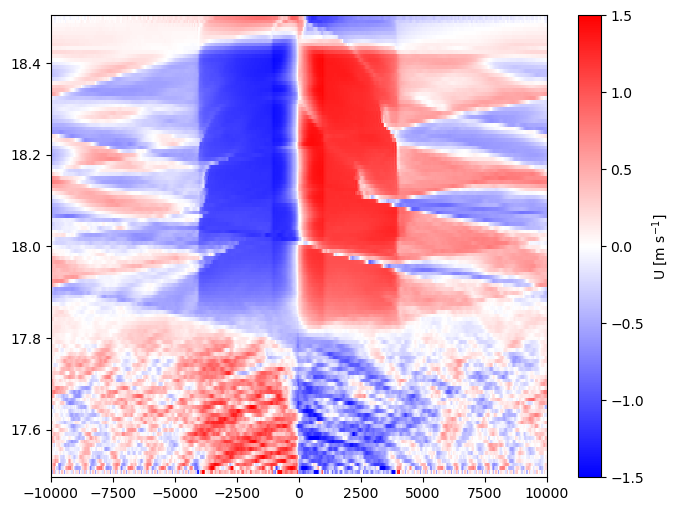

In [9]:
# fig, axs = plt.subplots( 1, 2, figsize=(12, 4) ) #panel with wind dir plot?
try:
    del(fig, axs)
    print("deleted old figure")
    fig, axs = plt.subplots( 1, 1, figsize=(8, 6) )
except:
    fig, axs = plt.subplots( 1, 1, figsize=(8, 6) )

cbarLabels = [r'U [m s$^{-1}$]']
vmin = -1.5
vmax = 1.5

cf = axs.pcolor( x, t,u.values, cmap="bwr", vmin=vmin, vmax=vmax)
# vmin, vmax = cf.get_clim()

plt.colorbar(
    cf,
    ax=axs,
    norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax),
    cmap="bwr",label=cbarLabels[0]
)


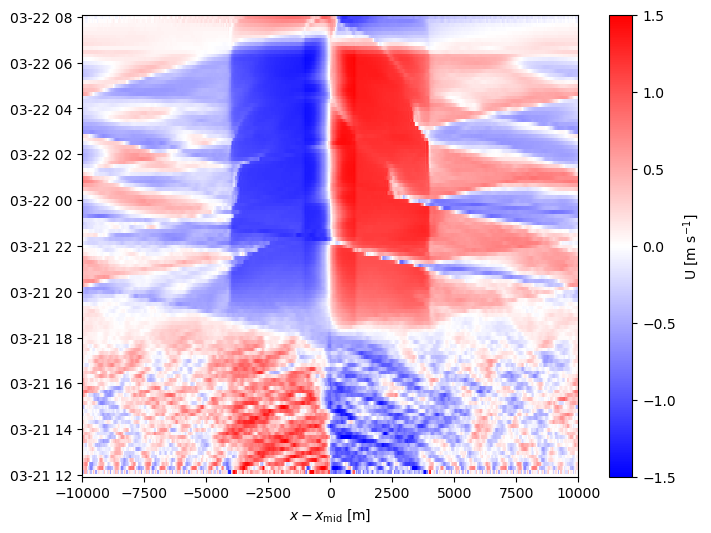

In [10]:
axs.set_yticks(tv[::12])
axs.set_yticklabels(times[::12].strftime('%m-%d %H'), rotation=0)
axs.set_xlabel(r'$x-x_{\text{mid}}$ [m]')
fig

In [11]:
save=True
if save:
    plt.figure(fig)
    fmts=["png","eps"]
    for fmt in fmts:
        plt.savefig("plots/"+savename+"."+fmt, format=fmt)